In [1]:
# Credit for labeling code goes to Jonathan Roth - modified to work with this experiment
%matplotlib inline

In [2]:
import glob
import os
import warnings

import matplotlib
import matplotlib.pyplot
import numpy
import skimage.io
import skimage.morphology
import skimage.filters
import skimage.segmentation
import tqdm

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [3]:
warnings.filterwarnings("ignore")

In [4]:
matplotlib.rcParams["figure.figsize"] = (12, 12)

imgpath = "/data1/santiago/BBBC021/images/"
predpath = "/data1/santiago/BBBC021/cnn-segmentation/predictions/"
outpath = "/data1/santiago/BBBC021/cnn-segmentation/labels/"

In [5]:
def prediction_pathname(image_pathname):
    parent = image_pathname.split("/")[-2]
    
    basename = os.path.basename(image_pathname)

    name, _ = os.path.splitext(basename)

    return os.path.join(predpath + parent, "{}.npy".format(name))

In [6]:
imgfiles = glob.glob(imgpath + "*/*w1*.tif")
predfiles = glob.glob(predpath + "*/*.npy")
assert(len(imgfiles) == len(predfiles))

In [7]:
def label_pathname(imgpath):
    split = imgpath.split("/")
    d = split[-2]
    path = outpath + d + "/"
    if not os.path.exists(path) :
        os.mkdir(path)
    return os.path.join(outpath+split[-2],split[-1])

In [8]:
for pathname in tqdm.tqdm(imgfiles):
    image = skimage.io.imread(pathname)
    prediction = numpy.load(prediction_pathname(pathname))[0,:,:,0]
    
    threshold = skimage.filters.threshold_li(prediction)
    binary = skimage.segmentation.clear_border(prediction > threshold)
    labels = skimage.morphology.label(binary, background=1)
    
    n_ccs = numpy.max(labels)
    #print('Number of connected components:', n_ccs)
    # buffer label image
    filtered_labels = numpy.zeros_like(labels, dtype=numpy.uint16)
    
    
    # relabel as we don't know what connected component the background has been given before
    label_index = 1
    
    # start at 1 (0 is contours), end at number of connected components
    for i in range(1, n_ccs + 1):
        
        # get mask of connected components
        mask = labels == i

        # get mean
        mean = numpy.mean(numpy.take(image.flatten(),numpy.nonzero(mask.flatten())))

        if(mean > 50):
            filtered_labels[mask] = label_index
            label_index = label_index + 1
    filtered_labels[filtered_labels == 1] = 0
    split = pathname.split("/")
    skimage.io.imsave(label_pathname(pathname), filtered_labels)
    

100%|██████████| 13200/13200 [2:17:14<00:00,  1.11it/s]  


In [9]:
'''
image = skimage.io.imread(imgfiles[0])

prediction = numpy.load(prediction_pathname(imgfiles[0]))
skimage.io.imshow(prediction)

threshold = skimage.filters.threshold_li(prediction)
binary = prediction >= threshold

labels = skimage.measure.label(binary, background=1)
regions = skimage.measure.regionprops(labels)
for region in regions:
    print(region.area)
_, (a, b, c) = matplotlib.pyplot.subplots(nrows=1, ncols=3, figsize=(16, 4))

a.imshow(image, cmap="gray")
b.imshow(binary, cmap="gray")
c.imshow(labels)
'''

'\nimage = skimage.io.imread(imgfiles[0])\n\nprediction = numpy.load(prediction_pathname(imgfiles[0]))\nskimage.io.imshow(prediction)\n\nthreshold = skimage.filters.threshold_li(prediction)\nbinary = prediction >= threshold\n\nlabels = skimage.measure.label(binary, background=1)\nregions = skimage.measure.regionprops(labels)\nfor region in regions:\n    print(region.area)\n_, (a, b, c) = matplotlib.pyplot.subplots(nrows=1, ncols=3, figsize=(16, 4))\n\na.imshow(image, cmap="gray")\nb.imshow(binary, cmap="gray")\nc.imshow(labels)\n'

In [10]:
#skimage.io.imshow(labels == 1)

In [11]:
#skimage.io.imshow("/storage/data/BBBC/BBBC021/labels/WWeek9_090907_B02_s1_w146B1CD84-EEA7-42A6-9B3F-4CC62BB8F179.png")

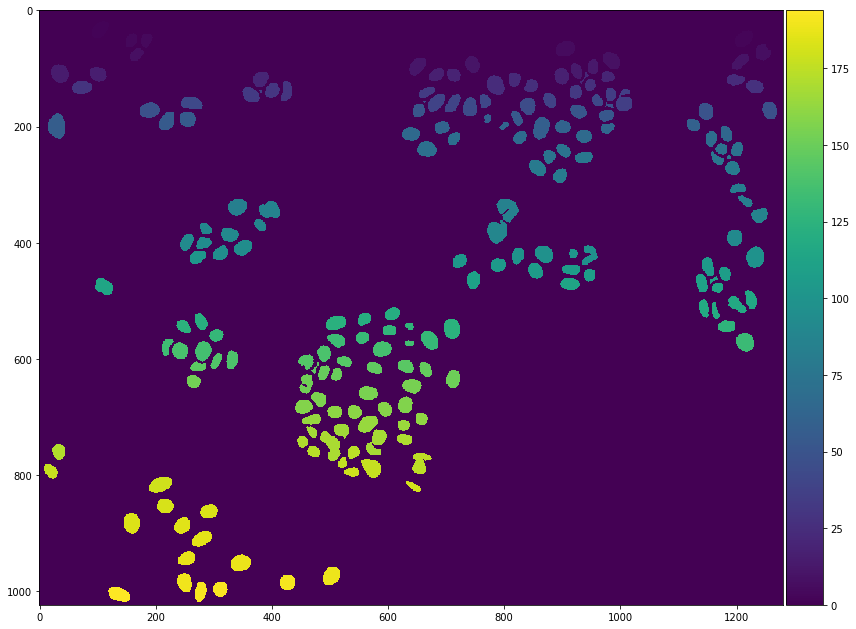

In [13]:
skimage.io.imshow("/data1/santiago/BBBC021/cnn-segmentation/labels/Week5_28921/Week5_130707_B03_s1_w11E334B20-5A86-4F53-ABE4-36F74FB9402B.tif")